In [1]:
# Import libraries that we need

import numpy as np 
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


from pprint import pprint

from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle

c:\users\costi\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
with open("p1.json") as file:
    data = json.load(file)
    
print (len(data))

21


In [3]:
minv = [float(x['ncloc']) for x in data]
print (minv)

[195.0, 108265.0, 9838.0, 26166.0, 5867.0, 684.0, 6737.0, 12984.0, 916.0, 10338.0, 41315.0, 2338.0, 9112.0, 619.0, 739.0, 9032.0, 89384.0, 1058.0, 64546.0, 430.0, 2969.0]


In [4]:
majv = [float(x['functions']) for x in data]
print (majv)

[16.0, 2697.0, 759.0, 2917.0, 609.0, 36.0, 312.0, 962.0, 116.0, 626.0, 2472.0, 212.0, 1298.0, 46.0, 41.0, 489.0, 5947.0, 100.0, 5540.0, 21.0, 261.0]


In [5]:
'''
for i in range(10):
    minv.append(i)
    majv.append(1)
for i in range(30):
    minv.append(i)
    majv.append(2)
minv.append(20000)
majv.append(1200)
minv.append(30000)
majv.append(2000)
minv.append(35000)
majv.append(2200)
minv.append(50000)
majv.append(3500)
minv.append(60000)
majv.append(4000)
minv.append(61000)
majv.append(4020)
minv.append(80000)
majv.append(5100)
'''

'\nfor i in range(10):\n    minv.append(i)\n    majv.append(1)\nfor i in range(30):\n    minv.append(i)\n    majv.append(2)\nminv.append(20000)\nmajv.append(1200)\nminv.append(30000)\nmajv.append(2000)\nminv.append(35000)\nmajv.append(2200)\nminv.append(50000)\nmajv.append(3500)\nminv.append(60000)\nmajv.append(4000)\nminv.append(61000)\nmajv.append(4020)\nminv.append(80000)\nmajv.append(5100)\n'

In [6]:
for i in range(len(minv) - 1):
    for j in range(i+1, len(minv)):
        if minv[i] > minv[j]:
            minv[i], minv[j] = minv[j], minv[i]
            majv[i], majv[j] = majv[j], majv[i]

In [7]:
print (minv)
print (majv)

[195.0, 430.0, 619.0, 684.0, 739.0, 916.0, 1058.0, 2338.0, 2969.0, 5867.0, 6737.0, 9032.0, 9112.0, 9838.0, 10338.0, 12984.0, 26166.0, 41315.0, 64546.0, 89384.0, 108265.0]
[16.0, 21.0, 46.0, 36.0, 41.0, 116.0, 100.0, 212.0, 261.0, 609.0, 312.0, 489.0, 1298.0, 759.0, 626.0, 962.0, 2917.0, 2472.0, 5540.0, 5947.0, 2697.0]


In [8]:
'''
for i in range(10):
del minv[-1]
del majv[-1]
'''

'\nfor i in range(10):\ndel minv[-1]\ndel majv[-1]\n'

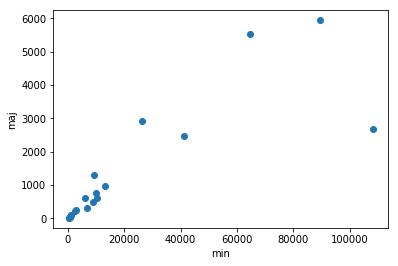

In [9]:
x = np.array(minv)
y = np.array(majv)

plt.scatter(x, y)
plt.xlabel("min")
plt.ylabel("maj")
plt.show()

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

datax_train, datax_test, datay_train, datay_test = train_test_split(x, y, test_size=0.33, random_state=1)
linear_reg = linear_model.LinearRegression()

datax_train = np.atleast_2d(datax_train).T
datay_train = np.atleast_2d(datay_train).T
datax_test = np.atleast_2d(datax_test).T
datay_test = np.atleast_2d(datay_test).T

linear_reg.fit(datax_train, datay_train)

predict = linear_reg.predict(datax_test)

In [11]:
from sklearn.metrics import r2_score

print ('r2_score:', r2_score(datay_test, predict))

r2_score: 0.5333810970478687


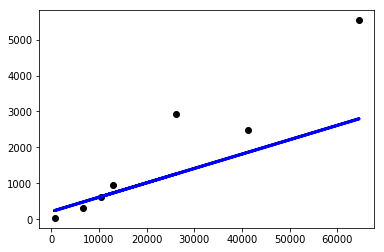

In [12]:
plt.scatter(datax_test, datay_test,  color='black')
plt.plot(datax_test, predict, color='blue', linewidth=3)


plt.show()

In [18]:
print (linear_reg.predict(4300))

[[384.83554089]]


In [13]:
def save_model(m, file_name):
    # Save the model
    filename = file_name + '.sav'
    pickle.dump(m, open(filename, 'wb'))

In [14]:
def load_model(file_name): 
    # load the model
    filename = file_name + '.sav'
    loaded_model = pickle.load(open(filename, 'rb'))
    
    return loaded_model

In [15]:
# Save the model
save_model(linear_reg, 'models/model_lr_ncloc_functions')

In [16]:
model = load_model('models/model_lr_ncloc_functions')

In [19]:
print (linear_reg.predict(10000))

[[772.60588767]]
